In [1]:
%matplotlib inline

import pandas as pd

# these will be useful later
import numpy  as np
from matplotlib import pyplot as plt

In [3]:
crime=pd.read_csv("mun.csv", index_col = "id", parse_dates = ["id"], encoding='iso-8859-1')
crime=crime.drop('SUBTIPO', axis=1)


In [4]:
hom14= crime[(crime['MODALIDAD']=='HOMICIDIOS') & (crime['TIPO'] == 'DOLOSOS' )]
hom14= hom14.groupby([hom14.index,'year','ENTIDAD', 'MUNICIPIO']).sum().reset_index()
hom14=hom14.set_index(['id'])
hom14=hom14[hom14.year == 2014]
hom14=hom14.rename(columns = {'total':'homicidios'})


In [5]:
pop=pd.read_csv("pop.csv", index_col = "id", parse_dates = ["id"], encoding='iso-8859-1')
pop=pop.drop('hom', axis=1)
pop=pop.drop('muj', axis=1)


In [10]:
tot14 = pd.concat([hom14, pop], axis=1)
tot14= tot14.drop('nom', axis=1)
tot14['hom_rate'] = (tot14['homicidios']/tot14['pop'])*100000


In [11]:
pdzp14 = pd.read_csv("PDZP_2014utf8.csv", index_col = "id", parse_dates = ["id"])
pdzp14.head(5)

,ClaveEntidad,NombreEntidad,ClaveMunicipio,NombreMunicipio,agua,drenaje,electrificacion,infraestructuraDeportiva,infraestructuraEducativa,infraestructuraSalud,bancosalimentos,ccas,otrasInfraestructura,suma,year
id,,,,,,,,,,,,,,,
2001,2,Baja California,1,Ensenada,0,0,0,0,0,0,0,0,7,7,2014
2003,2,Baja California,3,Tecate,0,0,0,0,0,0,0,0,3,3,2014
2004,2,Baja California,4,Tijuana,0,0,0,0,0,0,0,0,15,15,2014
2005,2,Baja California,5,Playas de Rosarito,0,0,0,0,0,0,0,0,1,1,2014
3001,3,Baja California Sur,1,Comond_,0,0,0,0,0,0,0,2,0,2,2014


In [12]:
pdzp14  = pdzp14.drop('ClaveEntidad', axis=1)
pdzp14  = pdzp14.drop('ClaveMunicipio', axis=1)
pdzp14  = pdzp14.drop('NombreEntidad', axis=1)
pdzp14  = pdzp14.drop('NombreMunicipio', axis=1)
pdzp14  = pdzp14.drop('bancosalimentos', axis=1)
pdzp14  = pdzp14.drop('agua', axis=1)
pdzp14  = pdzp14.drop('drenaje', axis=1)
pdzp14  = pdzp14.drop('electrificacion', axis=1)
pdzp14  = pdzp14.drop('ccas', axis=1)
pdzp14  = pdzp14.drop('otrasInfraestructura', axis=1)
pdzp14  = pdzp14.drop('infraestructuraEducativa', axis=1)
pdzp14  = pdzp14.drop('infraestructuraSalud', axis=1)
pdzp14  = pdzp14.drop('infraestructuraDeportiva', axis=1)
pdzp14  = pdzp14.drop('year', axis=1)
pdzp14  = pdzp14.rename(columns = {'suma':'Total Servicios 2014'})
tot14 = tot14.join(pdzp14)
tot14.head()


,year,ENTIDAD,MUNICIPIO,homicidios,pop,hom_rate,Total Servicios 2014
id,,,,,,,
1001,2014.0,AGUASCALIENTES,AGUASCALIENTES,31.0,797010.0,3.889537,NaN
1002,2014.0,AGUASCALIENTES,ASIENTOS,0.0,45492.0,0.000000,NaN
1003,2014.0,AGUASCALIENTES,CALVILLO,2.0,54136.0,3.694399,NaN
1004,2014.0,AGUASCALIENTES,COSIO,0.0,15042.0,0.000000,NaN
1005,2014.0,AGUASCALIENTES,JESUS MARIA,6.0,99590.0,6.024701,NaN


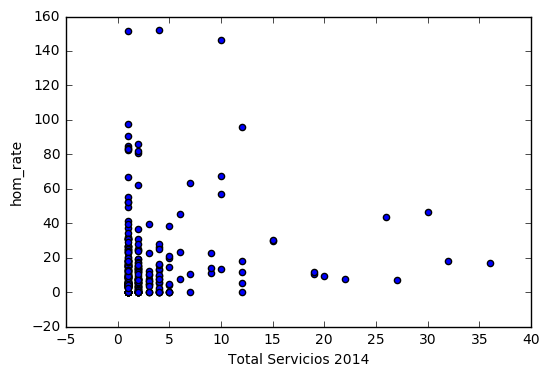

In [13]:
tot14.plot(kind = "scatter", x = "Total Servicios 2014", y = "hom_rate")